In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
import itertools
from IPython.core.display import display,HTML
try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata

    
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser

In [2]:
path_merge_linux='/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/'
#filename="Merged_linkedin-WoS_GS_extra70univ.pickle"
#filename_merged="Merged_linkedin-WoS_GS_extra70univ.pickle"
              
    
bucket_size=25 ###   25 or 250
macro_fields="_macro_fields" #  ""   or "_macro_fields"

#filename_merged="Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_all_and_by_field_for_Dropbox.pickle"
#new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_all_for_Dropbox_binSize250.pickle"
#new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_all_for_Dropbox_binSize25_macro_fields.pickle"


new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize"+str(bucket_size)+macro_fields+".pickle"
# new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize"+str(bucket_size)+"_macro_fields.pickle"
# new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize"+str(bucket_size)+".pickle"
# new="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize"+str(bucket_size)+".pickle"

   
#     /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize25_macro_fields.pickle



#%time df = pd.read_excel(open(path_merge_linux+filename.split(".")[0]+".xlsx",'rb'))

# print "done reading xlsx"

%time df = pd.read_pickle(new)

print "read:", new


print df.shape





CPU times: user 628 ms, sys: 60 ms, total: 688 ms
Wall time: 689 ms
read: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize25_macro_fields.pickle
(203161, 14)


In [3]:
print df.columns

len(df.University_linkedin.unique())

Index([        u'full_name_linkedin',                      u'Email',
              u'University_linkedin',                      u'Field',
               u'ranking_University', u'group_ranking20_University',
       u'group_ranking30_University', u'group_ranking50_University',
                 u'group_total_pubs',        u'group_num_coauthors',
             u'group_num_papers_1st',      u'group_num_papers_last',
            u'group_num_papers_solo',        u'group_num_citations'],
      dtype='object')


102

In [6]:
# df.groupby('ranking_University').size()
cont_num_complete_rows =0.
for item in pd.isnull(df['group_total_pubs']):
    if item ==False:
        cont_num_complete_rows +=1
print  "# rows with WoS info:",cont_num_complete_rows

# rows with WoS info: 75034.0


In [5]:
# df.groupby('ranking_University').size()
cont_num_complete_rows =0.
for item in pd.isnull(df['Email']):
    if item ==False:
        cont_num_complete_rows +=1
print  df.shape, "# rows with email:",cont_num_complete_rows

(203161, 14) # rows with email: 203161.0


In [ ]:
df.groupby('Field').size()

In [7]:
def replace_NAN(value):
    
    #pd.isnull(df2['one'])
#     print value, pd.isnull(value)
#     raw_input()
    
    
    if pd.isnull(value):
        return -1
    else: 
        return value
    

    
    

list_var=['University_linkedin','Field','ranking_University','group_ranking20_University','group_ranking30_University','group_ranking50_University','group_total_pubs','group_num_coauthors','group_num_papers_1st','group_num_papers_last','group_num_papers_solo','group_num_citations']


for var in list_var:
    new_var="new_"+str(var)
    print new_var
    df[new_var]=df[var].apply(replace_NAN)





# df_disamb_wos_test['University'] = df_disamb_wos_test.apply(lambda row: row.University.replace(", ",",").replace("[","").replace("]","").split(","), axis=1)


new_University_linkedin
new_Field
new_ranking_University
new_group_ranking20_University
new_group_ranking30_University
new_group_ranking50_University
new_group_total_pubs
new_group_num_coauthors
new_group_num_papers_1st
new_group_num_papers_last
new_group_num_papers_solo
new_group_num_citations


In [ ]:
# list_var=['University_linkedin','Field','ranking_University','group_total_pubs','group_num_coauthors','group_num_papers_1st','group_num_papers_last','group_num_papers_solo','group_num_citations']

# for var in list_var:
#     new_var="new_"+str(var)
#     print df[[var,new_var]].head(50)
#     raw_input()

In [8]:
print len(df.University_linkedin.unique())
print len(df.Field.unique())

102
6


In [ ]:
###################################################################
# for checking the number of rows with info in any given field(s):#
###################################################################


# full_name_linkedin
# Email
# University_linkedin
# Field
# ranking_University
# group_total_pubs
# group_num_coauthors
# group_num_papers_1st
# group_num_papers_last
# group_num_papers_solo
# group_num_citations

# df_complete_info=df[['full_name_linkedin','Field','group_num_citations']].dropna(how='any')  # by default, dropna drops a row if ANY  of the indicated fields are missing (i can also set it to if ALL the fields are missing: how='all')
# print df_complete_info.shape

In [ ]:
df.shape

In [9]:
dict_columns_size={}
for column in df.columns:
    df_complete_info=df[[column]].dropna(how='any')  # by default, dropna drops a row if ANY  of the indicated fields are missing (i can also set it to if ALL the fields are missing: how='all')
#    print column, len(df_complete_info)
    
    dict_columns_size[column]=len(df_complete_info)
    
    
    
sorted_list_dict = sorted(dict_columns_size.items(), key=operator.itemgetter(1))

sorted_list_dict=list(reversed(sorted_list_dict))
for item in sorted_list_dict:
    print item[0], item[1]

new_group_num_coauthors 203161
Field 203161
new_Field 203161
new_ranking_University 203161
new_group_ranking30_University 203161
new_group_ranking20_University 203161
new_group_num_papers_solo 203161
new_group_num_papers_1st 203161
University_linkedin 203161
Email 203161
full_name_linkedin 203161
new_group_total_pubs 203161
new_group_num_citations 203161
new_group_ranking50_University 203161
new_University_linkedin 203161
new_group_num_papers_last 203161
group_ranking30_University 203159
group_ranking50_University 203159
group_ranking20_University 203159
ranking_University 203159
group_total_pubs 75034
group_num_papers_last 75034
group_num_papers_1st 75034
group_num_papers_solo 75034
group_num_coauthors 75034
group_num_citations 75034


In [10]:
# print df.Field.unique()
# print df.columns
# print len(df.University_linkedin.unique())



#df.groupby("University_linkedin").size().sort_values()
df.groupby("University_linkedin").size().sort_values()

# print len(df.University_linkedin.unique())

# lista.plot(kind='bar',fontsize = 'xx-small')

# lista=df.sort_values(by="University_linkedin").groupby("University_linkedin").size()

# sorted(lista)



University_linkedin
Agriculture                                      1
University                                       1
Rockefeller University                          79
Georgetown University                          293
California Institute of Technology             364
University of Colorado                         405
Rensselaer Polytechnic Institute               455
Stony Brook University                         481
University of Rochester                        674
Colorado State University                      680
Emory University                               705
University of California Santa Cruz            728
Case Western Reserve University                761
University of Alabama                          828
Vanderbilt University                          901
Dartmouth College                              906
University of California Riverside             915
University of Vermont                          981
Tufts University                               987
University 

In [11]:


#### drop observations if they belong to the bottom universities in the list by ranking

# list_droppable_univ=["Drexel University", "Georgetown University" ,"Temple University","University of Vermont","University of Texas San Antonio",\
# "University of Texas Southwestern Medical Center at Dallas",'Dartmouth College',"Purdue University","Rensselaer Polytechnic Institute",\
# "North Carolina State University","University of Connecticut","Virginia Polytechnic Institute and State University",\
# "University of New Mexico","University of New Hampshire","University of Central Florida","Syracuse University","University of Kansas","Georgia State University"]


# list_droppable_univ=["Agriculture","University","Rockefeller University" \
# "University of New Hampshire","University of Central Florida","Syracuse University","University of Kansas","Georgia State University"]


list_droppable_univ=["Agriculture","University"]#\
 #"Rockefeller University","University of New Hampshire","University of Central Florida","Syracuse University","University of Kansas","Georgia State University"]



list_indices_to_keep=[]

for row in df.iterrows():
    #print row[1]["ranking_University"], row[1]["University_linkedin"], row[0]
    if row[1]["University_linkedin"] not in list_droppable_univ:
#         if row[0] not in list_indices_to_drop:
            list_indices_to_keep.append(row[0])
            
        
   
 


#list_indices_to_drop=list(set(list_indices_to_drop))
list_indices_to_keep=list(set(list_indices_to_keep))

print "# indices to keep:", len(list_indices_to_keep)



# i make a selection on the list of indices  (from the small buckets + droppable universities!)
df=df.iloc[list_indices_to_keep]
#df_to_drop=df.iloc[list_indices_to_drop]
df = df.reset_index(drop=True)

print "# of universities:",len(df.University_linkedin.unique())

# indices to keep: 203159
# of universities: 100


In [12]:
df.shape

(203159, 26)

In [ ]:
## to print out all possible combinations of variables and how many observations get dropped in each case

# NANs=0  # or 1


# if NANs ==1:   # 1: i use the columns that have some NANs
    
#     new_list_var=['University_linkedin','group_ranking20_University','group_ranking30_University','group_ranking50_University','ranking_University','Field','group_total_pubs','group_num_coauthors','group_num_papers_1st','group_num_papers_last',\
#  'group_num_papers_solo','group_num_citations']

#     filename=path_merge_linux+'sorted_combinations_with_NANs_binsize'+str(bucket_size)+macro_fields+'.txt'
         
   

# else:   # i use the columns where i have replaced any NANs by -1
#     new_list_var=["new_University_linkedin",'new_group_ranking20_University','new_group_ranking30_University','new_group_ranking50_University','ranking_University',"new_Field","new_group_total_pubs","new_group_num_coauthors","new_group_num_papers_1st",\
#                 "new_group_num_papers_last","new_group_num_papers_solo","new_group_num_citations"]
    
#     filename=path_merge_linux+'sorted_combinations_no_NANs_binsize'+str(bucket_size)+macro_fields+'.txt'
    
# f = open(filename, 'wt')

    
    
    
    
# dict_tuple_var_num_rows_in_too_small_bucket={}
# dict_tuple_var_fract_rows_in_too_small_bucket={}
# for L in range(0, len(new_list_var)+1):
#     for subset in itertools.combinations(new_list_var, L):
        
        
        
# #         print subset, len(subset), type(subset)
        

#         lista=list(subset)  
    
#         if len(lista)>0:                                
                                                    
#             tot=0.
#             small=0.
#             for num in df.reset_index().groupby(lista)['index'].count().sort_values():
#                 if num<20:
#                     small +=num
#                 tot += num

           
#             dict_tuple_var_num_rows_in_too_small_bucket[subset]=(small, tot)
#             dict_tuple_var_fract_rows_in_too_small_bucket[subset]=small/ tot
            


# # dict_tuple_var_num_rows_in_too_small_bucket[subset]=(small, tot)

# print >> f, "different combinations of var, and how many people do not fall in bins larger than 20"  

# for w in sorted(dict_tuple_var_fract_rows_in_too_small_bucket, key=dict_tuple_var_fract_rows_in_too_small_bucket.get, reverse=True):
#       print >> f, len(w),str(w).replace("('","").replace("')","").replace("', '","  ").replace("',)",""), " --->",dict_tuple_var_fract_rows_in_too_small_bucket[w], dict_tuple_var_num_rows_in_too_small_bucket[w][0],dict_tuple_var_num_rows_in_too_small_bucket[w][1]
 
# f.close()

# print "written:",  filename
   


In [14]:
# i check how many observations would i need to drop due to too-small buckets

#lista=["group_ranking30_University","Field","group_total_pubs","group_num_citations","group_num_papers_last"]#,"new_group_num_coauthors"]
lista=["new_group_ranking30_University","new_Field","new_group_total_pubs","new_group_num_citations","new_group_num_papers_last"]#,"new_group_num_coauthors"]


list_tuplas_values=[]
tot=0.
small=0.
for num in df.reset_index().groupby(lista)['index'].count().sort_values():
    if num<20:
        small +=num
    tot += num

print lista, "\n"
print "bucket size:",bucket_size, macro_fields
print  "# rows in df:",tot, "   # rows belowing to a too-small bucket:",small, "   ",small/tot*100,"%", "\n fraction from # rows with complete info:", 100-small/cont_num_complete_rows*100,"%"



# ['group_ranking30_University', 'Field', 'group_total_pubs', 'group_num_citations', 'group_num_papers_last'] 

# bucket size: 25 _macro_fields
# # rows in df: 79948.0    # rows belowing to a too-small bucket: 4370.0     5.46605293441 % 
#  fraction from # rows with complete info: 94.5339470656 %





# ['new_group_ranking30_University', 'new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 

# bucket size: 25 _macro_fields
# # rows in df: 225002.0    # rows belowing to a too-small bucket: 4376.0     1.94487160114 % 
#  fraction from # rows with complete info: 94.5264421874 %


['new_group_ranking30_University', 'new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 

bucket size: 25 _macro_fields
# rows in df: 203159.0    # rows belowing to a too-small bucket: 4644.0     2.28589429954 % 
 fraction from # rows with complete info: 93.8108057681 %


In [ ]:
# lista=["new_Field","new_group_total_pubs","new_group_num_citations","new_group_num_papers_last"]#,"new_group_num_coauthors"]

# grouped=df.reset_index().groupby(lista)['index'].count().sort_values()

In [15]:
# df.reset_index().groupby(lista)['index'].count().sort_values()

# for idx, value in grouped.iteritems():
#     print idx, value
#     raw_input()


def grouper(grp):
    return grp.values

grouped=df.reset_index().groupby(lista)['index'].apply(grouper)

In [16]:
list_indices_to_drop=[]
list_indices_to_keep=[]



filename=path_merge_linux+'bucket_labels_and_sizes_subset_to_keep'+str(bucket_size)+macro_fields+'.txt'
    
f = open(filename, 'wt')


#### drop indices if observations fall in too-small a bucket
for idx, value in grouped.iteritems():
    value=list(value)  # because it is an array with all the indices corresponding to a given group
    if len(value)<20:        
        list_indices_to_drop.extend(value)
        
        #print list_indices_to_drop, len(list_indices_to_drop)
        #raw_input()
    else:
        list_indices_to_keep.extend(value)
#df.iloc[value]
        print >> f, idx, len(value) #value, type(value),
print "tot # rows dropped:", len(list_indices_to_drop)


df_to_keep=df.iloc[list_indices_to_keep]
print len(list_indices_to_drop), len(list_indices_to_keep)


print "original df:",df.shape, "   df to keep:", df_to_keep.shape


f.close()
print "written:",filename

tot # rows dropped: 4644
4644 198515
original df: (203159, 26)    df to keep: (198515, 26)
written: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/bucket_labels_and_sizes_subset_to_keep25_macro_fields.txt


In [17]:
df_to_keep.head()

,full_name_linkedin,Email,University_linkedin,Field,ranking_University,group_ranking20_University,group_ranking30_University,group_ranking50_University,group_total_pubs,group_num_coauthors,...,new_ranking_University,new_group_ranking20_University,new_group_ranking30_University,new_group_ranking50_University,new_group_total_pubs,new_group_num_coauthors,new_group_num_papers_1st,new_group_num_papers_last,new_group_num_papers_solo,new_group_num_citations
465,ruth bielfeldt,bielfeldt@lmu.de,Harvard University,art,1.0,1-20,1-30,1-50,NaN,NaN,...,1.0,1-20,1-30,1-50,-1,-1,-1,-1,-1,-1
469,ioli kalavrezou,kalavrez@fas.harvard.edu,Harvard University,art,1.0,1-20,1-30,1-50,NaN,NaN,...,1.0,1-20,1-30,1-50,-1,-1,-1,-1,-1,-1
472,ewa lajerburcharth,burchart@fas.harvard.edu,Harvard University,art,1.0,1-20,1-30,1-50,NaN,NaN,...,1.0,1-20,1-30,1-50,-1,-1,-1,-1,-1,-1
473,carrie lambertbeatty,lambert2@fas.harvard.edu,Harvard University,art,1.0,1-20,1-30,1-50,NaN,NaN,...,1.0,1-20,1-30,1-50,-1,-1,-1,-1,-1,-1
475,gulru necipoglu,agakhan@fas.harvard.edu,Harvard University,art,1.0,1-20,1-30,1-50,NaN,NaN,...,1.0,1-20,1-30,1-50,-1,-1,-1,-1,-1,-1


84


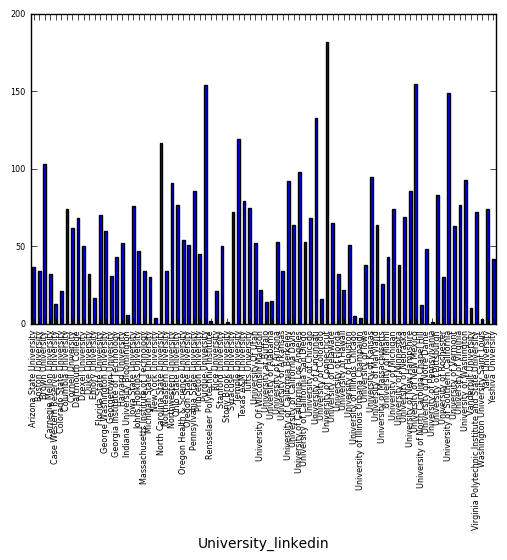

In [18]:
df_to_drop=df.iloc[list_indices_to_drop]
#lista=df_to_drop.groupby("University_linkedin").size().values
lista=df_to_drop.sort_values(by="University_linkedin").groupby("University_linkedin").size()

print len(df_to_drop.University_linkedin.unique())

lista.plot(kind='bar',fontsize = 'xx-small')

In [19]:
df_to_keep.groupby("University_linkedin").size().sort_values()

University_linkedin
Rockefeller University                          79
Georgetown University                          262
California Institute of Technology             364
University of Colorado                         389
Rensselaer Polytechnic Institute               453
Stony Brook University                         480
University of Rochester                        644
Colorado State University                      659
Emory University                               688
University of California Santa Cruz            728
Case Western Reserve University                748
University of Alabama                          813
Dartmouth College                              838
Vanderbilt University                          891
Tufts University                               912
University of California Riverside             915
University of Vermont                          918
University of South Florida                   1001
University of Massachusetts                   1008
Princeton U

In [20]:
## just to check that i dont need to drop any more observations

lista=["new_group_ranking30_University","new_Field","new_group_total_pubs","new_group_num_citations","new_group_num_papers_last"]#,"new_group_num_coauthors"]
print "double checking that there are no small buckets now:"

list_tuplas_values=[]
tot=0.
small=0.
for num in df_to_keep.reset_index().groupby(lista)['index'].count().sort_values():
    if num<20:
        small +=num
    tot += num
df = df.reset_index(drop=True)
print lista, "\n"
print "bucket size:",bucket_size, macro_fields
print  "# rows:",tot, "   # rows belowing to a too-small bucket:",small, "   ",small/tot*100,"%\n"

list_indices_to_keep=list(set(list_indices_to_keep))



print len(df.University_linkedin.unique())

double checking that there are no small buckets now:
['new_group_ranking30_University', 'new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 

bucket size: 25 _macro_fields
# rows: 198515.0    # rows belowing to a too-small bucket: 0.0     0.0 %

100


In [21]:
print len(df_to_keep.University_linkedin.unique())
for item in sorted(list(df_to_keep.University_linkedin.unique())):
    print item,"----",


100
Arizona State University ---- Baylor College of Medicine ---- Boston University ---- Brown University ---- California Institute of Technology ---- Carnegie Mellon University ---- Case Western Reserve University ---- City University of New York ---- Colorado State University ---- Columbia University ---- Cornell University ---- Dartmouth College ---- Drexel University ---- Duke University ---- Emory University ---- Florida State University ---- George Washington University ---- Georgetown University ---- Georgia Institute of Technology ---- Harvard University ---- Indiana University Bloomington ---- Iowa State University ---- Johns Hopkins University ---- M D Anderson Cancer Center University of Texas ---- Massachusetts Institute of Technology ---- Michigan State University ---- New York University ---- North Carolina State University ---- Northeastern University ---- Northwestern University ---- Ohio State University ---- Oregon Health & Science University ---- Oregon State Univers

In [22]:
# df.groupby('ranking_University').size()
num_complete_rows =0.
for item in pd.isnull(df_to_keep['group_total_pubs']):
    if item ==False:
        num_complete_rows +=1
print  "number of rows with WoS info",num_complete_rows

number of rows with WoS info 70390.0


In [23]:
# df.groupby('ranking_University').size()
cont_num_complete_rows =0.
for item in pd.isnull(df_to_keep['Email']):
    if item ==False: 
        cont_num_complete_rows +=1
print  df_to_keep.shape, "# rows with email:",cont_num_complete_rows

(198515, 26) # rows with email: 198515.0


In [24]:
filename=path_merge_linux+"Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize"+str(bucket_size)+macro_fields+"_no_small_buckets.xlsx"


                                   
%time df_to_keep.to_pickle(filename.split(".xlsx")[0]+".pickle")
print "pickle done:", filename.split(".xlsx")[0]+".pickle"



writer = pd.ExcelWriter(filename, engine='xlsxwriter',options={'strings_to_urls': False})
# Convert the dataframe to an XlsxWriter Excel object.
%time df_to_keep.to_excel(writer, sheet_name='Sheet1')
## OJO! hay url muy largas que hacen que el sistema se cuelgue (solucion: no permitirle que las considere url, sino simplemente str)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

print "xlsx done",filename

CPU times: user 1.45 s, sys: 116 ms, total: 1.56 s
Wall time: 1.87 s
pickle done: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize25_macro_fields_no_small_buckets.pickle
CPU times: user 1min 27s, sys: 544 ms, total: 1min 27s
Wall time: 1min 26s
xlsx done /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Merged_LinkedIn_WoS/Merged_linkedin-WoS_GS_extra70univ_anonymized_groups_for_Dropbox_binSize25_macro_fields_no_small_buckets.xlsx


In [25]:
df_to_keep.columns

Index([            u'full_name_linkedin',                          u'Email',
                  u'University_linkedin',                          u'Field',
                   u'ranking_University',     u'group_ranking20_University',
           u'group_ranking30_University',     u'group_ranking50_University',
                     u'group_total_pubs',            u'group_num_coauthors',
                 u'group_num_papers_1st',          u'group_num_papers_last',
                u'group_num_papers_solo',            u'group_num_citations',
              u'new_University_linkedin',                      u'new_Field',
               u'new_ranking_University', u'new_group_ranking20_University',
       u'new_group_ranking30_University', u'new_group_ranking50_University',
                 u'new_group_total_pubs',        u'new_group_num_coauthors',
             u'new_group_num_papers_1st',      u'new_group_num_papers_last',
            u'new_group_num_papers_solo',        u'new_group_num_citations']

In [26]:
df_complete_info=df_to_keep[['full_name_linkedin','University_linkedin', 'group_total_pubs','group_num_citations','new_group_num_papers_last']].dropna(how='any')  # by default, dropna drops a row if ANY  of the indicated fields are missing (i can also set it to if ALL the fields are missing: how='all')
print df_complete_info.shape





(70390, 5)


In [ ]:

## lista=["new_group_total_pubs","new_group_num_coauthors","new_group_num_papers_1st","new_group_num_papers_last","new_group_num_papers_solo","new_group_num_citations"]

# lista=["new_University_linkedin","new_Field","new_group_total_pubs","new_group_num_citations","new_group_num_papers_last"]
# lista=["new_Field","new_group_total_pubs","new_group_num_citations","new_group_num_papers_last","new_group_num_papers_1st","new_group_num_papers_solo"]

# df.reset_index().groupby(lista)['index'].count().sort_values()

In [ ]:
df_to_keep.shape

In [ ]:
# #df.reset_index().groupby(["new_group_num_papers_1st","new_ranking_University"])['index'].count().sort_values()
# #df.reset_index().groupby(["group_num_papers_1st","ranking_University"])['index'].count().sort_values()

# #lista=["group_num_papers_1st","ranking_University"]
# lista=["new_group_num_papers_1st","new_ranking_University"]


# tot=0.
# small=0.
# for num in df.reset_index().groupby(lista)['index'].count().sort_values():
#     if num<20:
#         small +=num
#     tot += num

# print lista    
# print  "# rows with values in all:",tot, "   # rows belowing to too-small buckets:",small, "   ",small/tot,"\n"

In [ ]:

##############################
########## percentage (calculated on the df without NANs)

####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 25 _macro_fields
####  rows: 225004.0    # rows belowing to a too-small bucket: 1016.0     0.451547528044 %



####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 250 
####  rows: 225004.0    # rows belowing to a too-small bucket: 5498.0     2.44351211534 %


####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 25 
####  rows: 225004.0    # rows belowing to a too-small bucket: 5498.0     2.44351211534 %


####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 250 _macro_fields
####  rows: 225004.0    # rows belowing to a too-small bucket: 987.0     0.438658868287 %




####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last', 'new_group_num_papers_1st', 'new_group_num_papers_solo'] 

####  bucket size: 250 _macro_fieldscual dirias t'u que va a ser el impact factor de Science Advances...? gracias! :)
####  rows: 225004.0    # rows belowing to a too-small bucket: 4630.0     2.05774119571 %




####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last', 'new_group_num_papers_1st'] 

####  bucket size: 250 _macro_fields
####   rows: 225004.0    # rows belowing to a too-small bucket: 3499.0     1.55508346518 %



########################################
########## percentage (calculated on the df without NANs)

####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 25 _macro_fields
####  rows: 79948.0    # rows belowing to a too-small bucket: 1016.0     1.27082603692 %

####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 250 
####  rows: 79948.0    # rows belowing to a too-small bucket: 5498.0     6.87697003052 %

####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 25 
####  rows: 79948.0    # rows belowing to a too-small bucket: 5498.0     6.87697003052 %

####  ['new_Field', 'new_group_total_pubs', 'new_group_num_citations', 'new_group_num_papers_last'] 
####  bucket size: 250 _macro_fields
####  rows: 79948.0    # rows belowing to a too-small bucket: 987.0     1.2345524591 %



##########################################


####  ['new_University_linkedin', 'Field', 'group_total_pubs', 'group_num_citations', 'group_num_papers_last'] 

####  bucket size: 250 _macro_fields
####  rows: 79948.0    # rows belowing to a too-small bucket: 42682.0     53.3872016811 %



##########   6 new_Field  new_group_total_pubs  new_group_num_papers_1st  new_group_num_papers_last  new_group_num_papers_solo  new_group_num_citations  ---> 0.0205774119571 4630.0 225004.0

In [ ]:
# Drexel University   
# Georgetown University  
# Temple University    
# University of Vermont  
# University of Texas San Antonio
# University of Texas Southwestern Medical Center at Dallas
# Dartmouth College
# Purdue University
# Rensselaer Polytechnic Institute
# North Carolina State University
# University of Connecticut
# Virginia Polytechnic Institute and State University
# University of New Mexico
# University of New Hampshire
# University of Central Florida
# Syracuse University
# University of Kansas
# Georgia State University
